# <ins> Data Analysis Synopsis: </ins>

### For this data analysis I am using the 'No-show appointments' dataset.

This dataset is information regarding whether patients were listed as show or no-show for 
medical appointments in Brazil. 

#### For additional clarity -the following data definitions are applicable:

>* Age = Age of patient
>* Gender = Gender of patient
>* Diagnosis = Medical term used to define illness

> *  For this dataset evaluation, I am going to analyze attendance data regarding Age, Gender, and Diagnosis attributes to see if there are correlations, relevant statistics or other patterns.



<a id='intro'></a>
## Introduction

<!-- > **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore. -->

> In the healthcare industry the ability to analyze appointment data is beneficial in multiple ways:
> -------------------------------------------------------------------------------------------------

> 1. It is helpful to the health care providers to identify trends, which can be used to create a plan of action regarding possible solutions to increase appointment attendance.  

> 2. The data can be used as a tool to measure or determine if there is an issue regarding staff scheduling procedures.

> 3. The analysis can be used to identify potential gaps in scheduling software capabilites.

### Analysis Questions: 
> 1. Is patient attendance effected by Gender ?
> 2. Is patient attendance effected by Age ?

<a id='intro'></a>

## In order to process and analyze this data, the following Python libraries are used:
    
> * numpy
> * pandas
> * matplotlib
> * plotly
    

# <ins> Data load process: </ins>

At this stage, I am importing the necessary packages listed above; in order to load, view, examine, clean, analyize 
and graph the data for my analysis.


In [1]:
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

%matplotlib inline

In [2]:
df = p.read_csv('KaggleV2-May-2016 2.csv')

### Data review -1st pass:

Now that the data has been loaded, I will take a look at 10 records to examine the data format, column names and column values. 

In [3]:
df.head(10) # using head with a parameter of 10 to view the first 10 rows of the dataset.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### Data review results - 1st pass:

After examining some of the records, some of the column diagnosis headers looked incorrect.

I will take a closer look at the column header data and data type using dtype. 

In [4]:
df.dtypes 

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Data review results - further analysis - 1st pass: 

#### <u> The following errors (errant information) have been identified in the data: <u>

#### 1A. Incorrect diagnosis column spellings:

> * Hipertension, which should be Hypertenstion.
> * Handcap, which should be Handicap.

#### 1B. Incorrect data types (the column has date/time values but the datatypes are listed as string objects):

> * ScheduleDay
> * AppointmentDay

#### 1C. Incorrect data types (the column has a data type of float but seems like it should be int64):

> * PatientId

#### Data Correction: 1A. Incorrect diagnosis column spellings:

In [5]:
df = df.rename(columns={'Hipertension': 'Hypertension', 
                        'Handcap': 'Handicap'})

#### Data Correction: 1B. Incorrect data types (the column has date/time values but the datatypes are listed as string objects):

In [6]:
df['ScheduledDay'] = p.to_datetime(df.ScheduledDay)

In [7]:
df['AppointmentDay'] = p.to_datetime(df.AppointmentDay)

#### Data Correction: 1C. Incorrect data types (the column has a data type of float but seems like it should be int64):

In [8]:
df['PatientId'] = df['PatientId'].astype(int)

### Data Verification - 1st pass :

#### In this section I am verifying the data wrangling and cleaning using dtypes to see the column names and datatypes.

In [9]:
df.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No-show                        object
dtype: object

### Data review - 2nd pass:

Now that the data has been cleaned and reviewed, I will take a look at the following to get further insight to determine next steps:

> * The total number of records and columns using shape.
> * Statistical info using describe.
> * Null values (if any), Total Data Types, and Total file size using info with deep as parameter.

In [10]:
df.shape 

(110527, 14)

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
df.info(memory_usage='deep') # using this function to determine the datatype and memory usage of this file.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

### Data review results - 2nd pass:

#### 2A. The min value in the Age column is -1, which is incorrect. Values less than zero will be removed. 

#### 2B. Shape indicates that there are 110527 rows, info shows the same number for each column = No Null values found.

#### 2C. For analysis only the specified columns will be evaluated: 
> * Gender
> * Age
> * Hypertension
> * Diabetes
> * Alcoholism
> * Handicap
> * SMS_recieved
> * No-show

In [13]:
df = df.loc[df['Age'] >= 0]

#### Data Correction: 2B. Since no null values were found there is no update is needed for nulls.

#### Data Correction: 2C. Only the specified columns have been selected. Initially I did this using drop but after looking the size of the data creating a new variable reduced the data size from 21 to 17 mb, so I am going with the size reduced approach for now.

In [14]:
# df.drop(['PatientId', 
#          'AppointmentID', 
#          'ScheduledDay', 
#          'AppointmentDay', 
#          'Neighbourhood',
#          'Scholarship'], 
#          axis = 1, 
#          inplace = True)

In [15]:
cols = ['Gender',
        'Age',
        'Hypertension',
        'Diabetes', 
        'Alcoholism', 
        'Handicap', 
        'SMS_received', 
        'No-show']

In [16]:
df[cols].head(2)

,Gender,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,62,1,0,0,0,0,No
1,M,56,0,0,0,0,0,No


In [17]:
df[cols].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110526 non-null  object
 1   Age           110526 non-null  int64 
 2   Hypertension  110526 non-null  int64 
 3   Diabetes      110526 non-null  int64 
 4   Alcoholism    110526 non-null  int64 
 5   Handicap      110526 non-null  int64 
 6   SMS_received  110526 non-null  int64 
 7   No-show       110526 non-null  object
dtypes: int64(6), object(2)
memory usage: 18.3 MB


## <ins> Data Analysis: </ins>


### I shall begin the data analysis now that the data has been cleaned and prepared.

### I will now take a look at the data statistics and create data visulizations to analysize the data from a visual and statistical perspective.

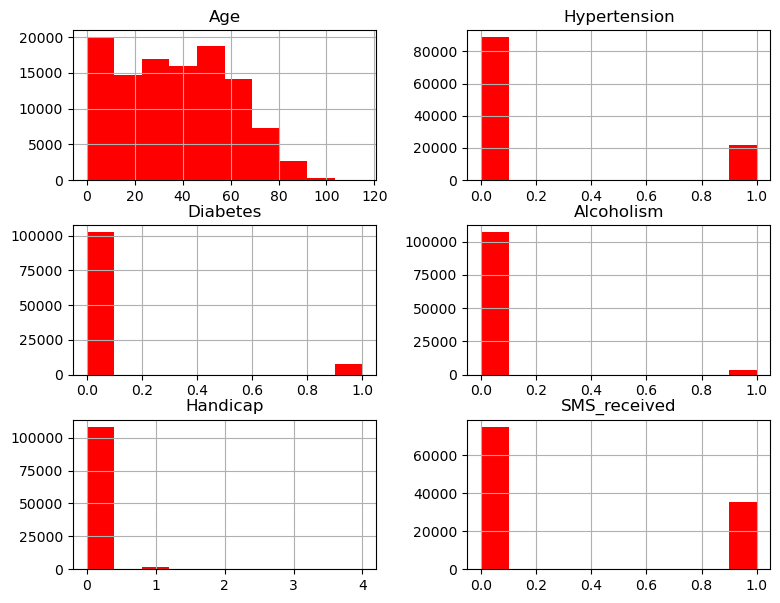

In [18]:
df[cols].hist(figsize=(9,7), color="red");

>* The right skewing of the Age data, indicates that the majority of the appointments were setup for younger patients.
>* There does not appear to be a significant number of patients with any of the Medical Diagnoses.
>* SMS recieval was approximately 25%.

## Analysis Question #1: 
 > 1. Is patient attendance effected by Gender ?

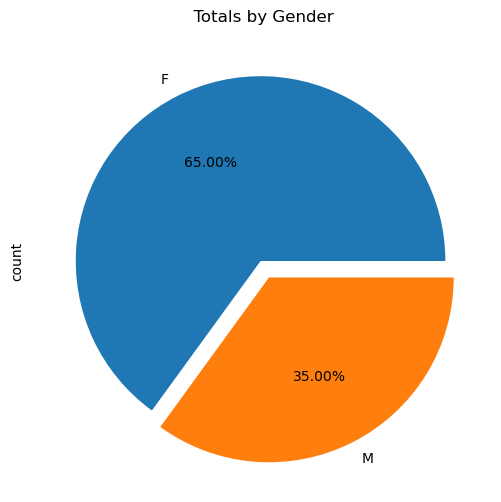

In [19]:
df['Gender'].value_counts().plot(kind='pie', title='  Totals by Gender '\
                                 ,figsize=(14,6),explode=[0,0.1],autopct='%1.2f%%');  # showing 1 variable (1d)

#### Single Variable Distribution -1D

For this analysis, the total number of patients ratio based on gender attendance was calculated.

This graph is showing the patient / member - percentage totals by Gender:

Based on previous studies from Federal aid based regulatory agencies like the Center for Medicare and Medicaid Services, 
the number of females that are on certain medical programs are typically higher than the total number of males. 

This data can be useful in the event that further drill down is required in regard to infants 0-1 yrs/old and moms appointment data. 

The number of females is approximately 54% higher than the number of males.

At this stage I can't tell if there is a correlation so I will take a another look using a 2 variable distributiion (shown in the bar chart below).


In [20]:
df['No Show']=(df['No-show'] == 'Yes').astype(int)
df['No Show'].value_counts()  # converting No-show value from string to int

No Show
0    88207
1    22319
Name: count, dtype: int64

In [21]:
def attendance_grp(df,var_grp, yax='No Show', stat='mean', mul=100, figsize=[16, 5], color = 'red'):
    ''' This function is used to populate graph data based on attendance'''
    df.groupby(var_grp)[yax].agg(stat).mul(mul).plot.bar(edgecolor='black',figsize=figsize,rot=0,width=0.9,color=color);
    plt.title(f'Impact of {var_grp} on {"Attendance" if yax=="No Show" else  yax}'.title(), fontsize=14, weight="bold")
    plt.xlabel(var_grp.title(), fontsize=12, weight="bold")
    plt.ylabel(f'{"Perentage" if yax=="No Show" else stat} {yax}'.title(), fontsize=12, weight="bold")
   
    
# creating a function to accept variables and plot data.

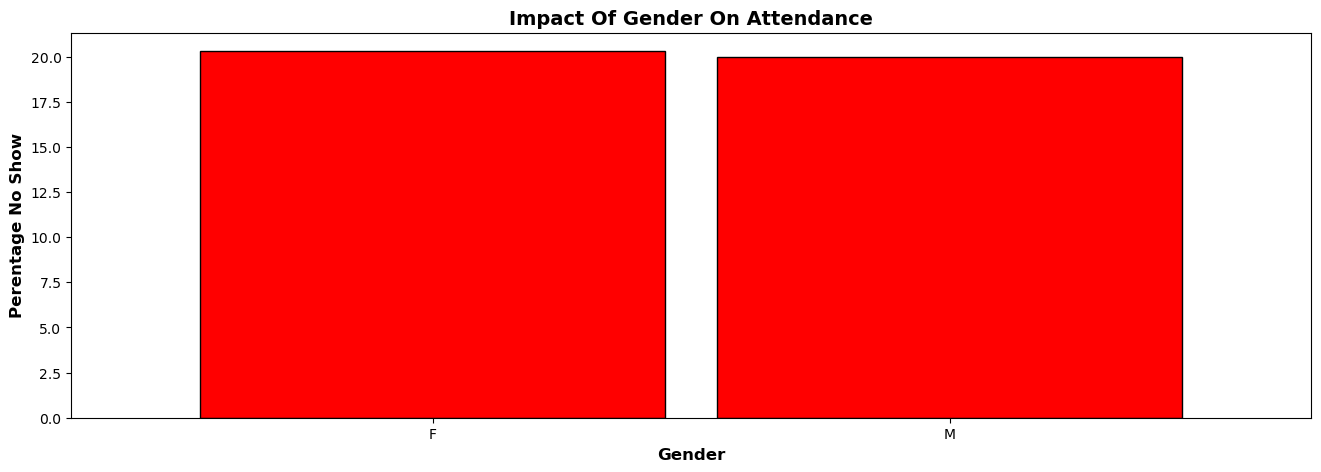

In [22]:
attendance_grp(df,'Gender')

#### 1st - Multi-variable Distribution -2D

For this analysis, I was trying to determine if attendance was effected by Gender.

This graph is showing the percentage of appointment no-shows by Gender:

I was analysizing this data to see if there was a greater no-show rate for one gender vs the other . The number of female no-shows is approximately 5% higher than the male no-shows. There is no significant difference in gender no-show rates.

Had there been a significant discrepancy, then one of the groups could have been targeted for follow-up.

Based on this histogram, Gender does not impact attendance in any significant way as there is no correlation indicated. 

However, the ratio of show vs no-show for each Gender seems similiar.

## Analysis Question #2:
> 2. Is patient attendance effected by Age ?

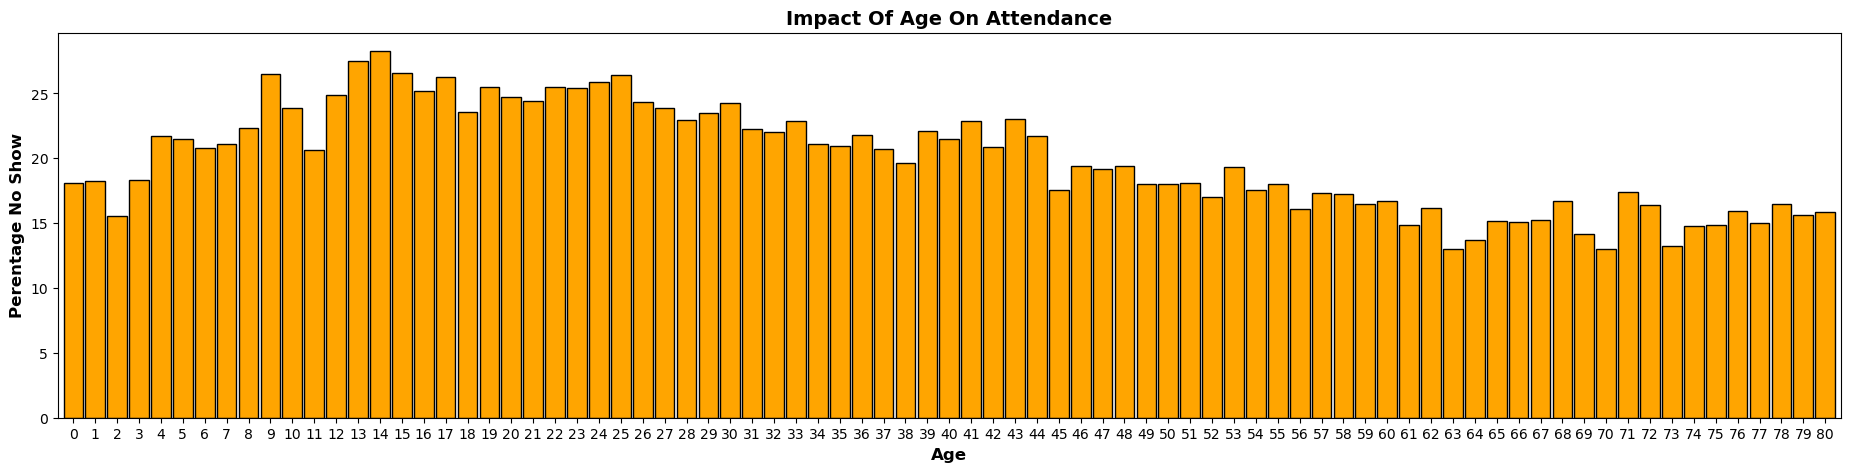

In [23]:
attendance_grp(df.query('Age<81'),'Age',figsize=[23, 5], color = 'orange')

In [24]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

#### 2nd - Multi-Variable Distribution -2D

For this analysis, I was trying to determine if attendance was effected by age.

This graph is showing the percentage of appointment no-shows by age:

The average age for this patient list is 37.
The minimum age is 0, which indicates that there are newborns in this list.

Based on the data used for this analysis, proporionately it seems that ages 40+ have the least amount of no-shows. 
This result seems reasonable as the perception of health and the accountability to maintain health would impact decisions to 
make and show for appointments.  

This indicates that attendance is effected by age.

There does not seem to be a strong pattern or proportion identified for any of the specified diagnosis.

<a id='conclusions'></a>
## <ins> Conclusions</ins>

> Based on the dataset and the columns chosen, I could not identify a significant factor that impacted the attendance. I initially was under the impression that diagnosis would have a greater impact as patients who may have chronic illnesses would have more appointments and would be more likely to show up out of extreme necessity. However the correlation to no show was insignificant.

> The second factor I thought would have an impact was age as it would seem that a more mature or elderly person would attend more based on need or participating in proactive initiatives. However, the data did not indicate that this was the case as more appointments were attended by a younger group.

 ## <ins> Limitation </ins>

> Since the columns chosen for this analysis did not yield any significant results, I would re-evaluate this analysis using additional columns such as the appointmentment and schedule dates as well as the neighborhood and scholarship columns to see what results are obtained.


